<a href="https://colab.research.google.com/github/aritro1011/ExploratoryDataAnalysis_Indian_Food/blob/main/IndianFoodEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EXPLORATORY DATA ANALYSIS ON indian_food.csv**
-This DATASET indian_food.csv contains information about various indian dishes with 9 specified columns viz. 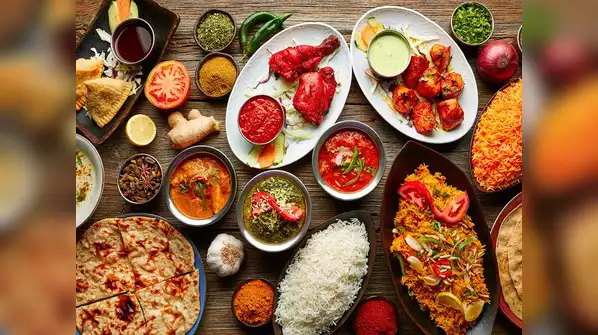**

                                                                                



  -Name     
                                                                     -ingredients                                                                  
  -diet                                                                         
  -prep_time                                                                    
  -cook_time  
                                                                    -flavor_profile                                                               
                                                                    
-course                 
                                                      -state                                    
                                                      -reigon                                                                       






-We Shall be performing Exploratory Data Analysis and various data visualization techniques on this dataset as a part of this project.

# **import all the necessary libraries required for the code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
# Set Plotly renderer for Colab
pio.renderers.default = 'colab'

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


# **Load the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/datasets/indian_food.csv'
data = pd.read_csv(file_path)



# **Display basic information**

In [4]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [5]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
# Frequency distribution of categorical variables
diet_freq = data['diet'].value_counts()
flavor_profile_freq = data['flavor_profile'].value_counts()
course_freq = data['course'].value_counts()
state_freq = data['state'].value_counts()
region_freq = data['region'].value_counts()

print(diet_freq, flavor_profile_freq, course_freq, state_freq, region_freq)


diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64 flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: count, dtype: int64 course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64 state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64 region
West          74
South         59
North         49
East          31
North East    25
-1            13
Central       

In [8]:
# Grouping by diet and calculating mean prep and cook time
grouped_by_diet = data.groupby('diet')[['prep_time', 'cook_time']].agg(['mean', 'min', 'max', 'std'])

# Grouping by course and calculating mean prep and cook time
grouped_by_course = data.groupby('course')[['prep_time', 'cook_time']].agg(['mean', 'min', 'max', 'std'])

print(grouped_by_diet)
print(grouped_by_course)


                prep_time                      cook_time                    
                     mean min  max        std       mean min  max        std
diet                                                                        
non vegetarian  27.068966  -1  240  63.043597  25.862069  -1  120  26.768484
vegetarian      31.623894  -1  500  73.794701  35.641593  -1  720  50.296453
              prep_time                       cook_time                    
                   mean  min  max        std       mean min  max        std
course                                                                     
dessert       27.047059   -1  480  64.160867  43.929412  -1  720  77.029955
main course   25.162791   -1  500  66.442267  29.930233  -1  120  21.804954
snack         51.974359   -1  360  96.211250  29.102564  -1   90  23.458580
starter      180.000000  120  240  84.852814  37.500000  30   45  10.606602


In [9]:
# Checking unique values in categorical columns
for col in ['diet', 'flavor_profile', 'course', 'state', 'region']:
    print(f"Unique values in {col}: {data[col].nunique()}")
    print(data[col].unique())
    print("\n")


Unique values in diet: 2
['vegetarian' 'non vegetarian']


Unique values in flavor_profile: 5
['sweet' 'spicy' 'bitter' '-1' 'sour']


Unique values in course: 4
['dessert' 'main course' 'starter' 'snack']


Unique values in state: 25
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


Unique values in region: 7
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]




# **Handle missing values**

In [10]:
data.isnull().any()

,0
name,False
ingredients,False
diet,False
prep_time,False
cook_time,False
flavor_profile,False
course,False
state,False
region,True


In [11]:
data.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


In [12]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [13]:
data.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,30
cook_time,28
flavor_profile,29
course,0
state,24
region,14


# **Dataset shape**

In [14]:
data.shape

(255, 9)

#**Analyzing the Most Common Ingredients:**
You can split the ingredients column into individual components and analyze which ingredients appear most frequently.

In [15]:
# Split ingredients into individual components
all_ingredients = data['ingredients'].str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

# Count frequency of each ingredient
ingredient_freq = all_ingredients.value_counts()
print(ingredient_freq.head(10))


sugar           44
ginger          29
garam masala    27
ghee            25
curry leaves    25
jaggery         20
urad dal        17
Rice flour      16
milk            15
tomato          15
Name: count, dtype: int64


 # **Pie chart for distribution of diets**

In [16]:
pie_data=data.diet.value_counts().reset_index()


# **Create the pie chart using Plotly Express**

In [17]:
pie_data.columns=['diet','count']
fig=px.pie(pie_data,values='count',names='diet',title='Distribution of Diets')
color_discrete_sequence=['green','red']
fig.show()

# **Sorting cooking time for bar chart**

In [18]:
cooking_time=data[['cook_time','name']]

In [19]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


# **Bar chart for top 10 shortest cook times**

In [20]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [21]:
ten_cook_quickly=cooking_time.head(10)

In [22]:
#cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()

In [23]:
#cook_data.columns = ['cook_time','name']
fig=px.bar(ten_cook_quickly,x='cook_time',y='name',title='Top 10 Cook Time')
fig.show()

#  To Analyze the distribution of prep_time and cook_time to understand which dishes require more or less time
Using describe() on numeric columns to get insights like mean, min, max, and quartiles.

In [24]:
data[['prep_time', 'cook_time']].describe()


,prep_time,cook_time
count,225.000000,227.000000
mean,35.386667,38.911894
std,76.241081,49.421711
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


# **Top 5 Longest and Shortest Prep and Cook Times:**
Visualizing the top 5 dishes with the longest and shortest preparation and cooking times.

In [25]:
# Top 5 dishes with the longest prep and cook times
longest_prep = data[['name', 'prep_time']].sort_values(by='prep_time', ascending=False).head(5)
longest_cook = data[['name', 'cook_time']].sort_values(by='cook_time', ascending=False).head(5)

# Plotly bar plot for longest prep time
fig = px.bar(longest_prep, x='prep_time', y='name',
             orientation='h',
             title="Top 5 Dishes with Longest Preparation Time",
             labels={'prep_time': 'Preparation Time (minutes)', 'name': 'Dish Name'})
fig.show()

# Plotly bar plot for longest cook time
fig = px.bar(longest_cook, x='cook_time', y='name',
             orientation='h',
             title="Top 5 Dishes with Longest Cook Time",
             labels={'cook_time': 'Cook Time (minutes)', 'name': 'Dish Name'})
fig.show()


#**Cross-tabulation of Diet and Flavor Profile:**
We can explore how the flavor profiles (e.g., sweet, spicy) vary between different diets.

In [26]:
# Cross-tabulation of diet and flavor_profile
diet_flavor_profile = pd.crosstab(data['diet'], data['flavor_profile'])

# Visualizing using Plotly bar plot
fig = px.bar(diet_flavor_profile,
             barmode='group',
             title="Diet and Flavor Profile Distribution",
             labels={'index': 'Diet', 'value': 'Count'})
fig.show()


#**Distribution Plots for prep_time and cook_time:**

Plotting histograms to check the distribution of cooking and preparation times.

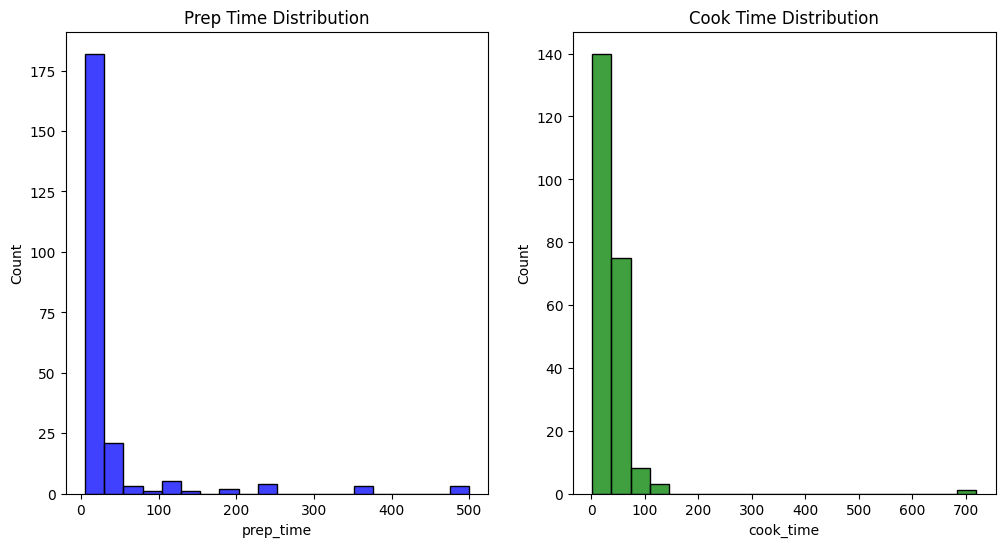

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data['prep_time'], bins=20, ax=axes[0], color='blue').set(title='Prep Time Distribution')
sns.histplot(data['cook_time'], bins=20, ax=axes[1], color='green').set(title='Cook Time Distribution')
plt.show()


#**TOP INGREDIENTS WORD CLOUD**

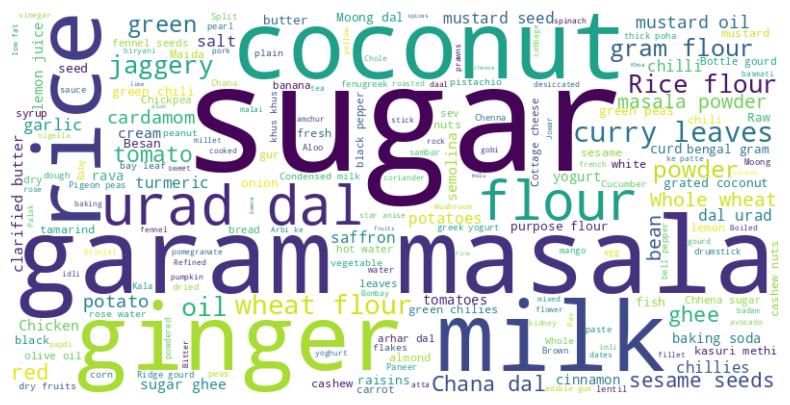

In [28]:
ingredients_text = ' '.join(data['ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
